# Optical Pumping Lab
##### Phys 432 Spr 23
### Zachary Banken

In [1]:
# Run this cell with Shift-Enter, and wait until the 
# asterisk changes to a number, i.e., [*] becomes [1]
import numpy as np
import scipy.constants as const
import uncertainties as unc
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
from lmfit.models import LinearModel
line = LinearModel()

In [3]:
def line_fit_and_plot(xdata, ydata, yerr=None, model=LinearModel(), \
                      title='', xlabel='', ylabel='', do_plot = True,):
    '''
    Fit a line or curve, and plot/show the fit results.
    The function returns a parameters object with the fit parameters
    '''
    param_guess = model.guess(ydata, x=xdata)
    if (yerr is None):
        model_fit = model.fit(ydata, param_guess, x=xdata)
    else:
        model_fit = model.fit(ydata, param_guess, x=xdata, weights=1/yerr)
    
    if do_plot:
        
        print(model_fit.fit_report(show_correl=False))
        model_fit.plot()
        plt.title(title)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
    return model_fit.params

## This function use the Uncertainties function to make an uncertainty object

def get_uslope(params):
    return unc.ufloat(params['slope'].value, params['slope'].stderr, 'slope')

In [4]:
# import 
Rb85_freq_offset = pd.read_csv('Rb85_freq_offset.csv',header='infer')
Rb87_freq_offset = pd.read_csv('Rb87_freq_offset.csv',header='infer',skiprows=1)

In [5]:
# Excercise 1

muB = const.physical_constants["Bohr magneton"][0]

H0 = (0.5 / 10_000)

# Assuming gF = 1/2, delta mF = 1
deltaE = 0.5 * muB * H0 * 1

frac_excess_pop = (deltaE / (const.k * 293)) * 1e6

print('Excess population:',round(frac_excess_pop,2), 'ppm')

Excess population: 0.06 ppm


## Estimate the experimental g-factor for both isotopes and the ratio of these.


In [6]:
## g-factor estimation 

## h nu_F = g_F mu_B H_0 delta_m_F

nu_F_85 = 230e3 # approximate resonance frequency (Hz)
nu_F_87 = 349e3
H0 = (0.5 / 10_000) ## half a gauss
delta_m_F = 1
h = const.h

g_F_estimate_85 = (h * nu_F_85) / (muB * H0 * delta_m_F)
g_F_estimate_87 = (h * nu_F_87) / (muB * H0 * delta_m_F)

print('Estimated g_F (Rb 85):',g_F_estimate_85)
print('Estimated g_F (Rb 87):',g_F_estimate_87)
print('Estimated ratio (g_F Rb 85)/(g_F Rb 87):',g_F_estimate_85 / g_F_estimate_87)

Estimated g_F (Rb 85): 0.32865958126699824
Estimated g_F (Rb 87): 0.49870519070514074
Estimated ratio (g_F Rb 85)/(g_F Rb 87): 0.6590257879656162


## Make plots with fits (& uncertainty) of offset voltage vs. frequency (method 1)


In [7]:
# Frequencey at zero offset

Rb85_inverse_fit = np.polyfit(Rb85_freq_offset['Offset (V)'], Rb85_freq_offset['Frequency (kHz)'],  1)
Rb85_inverse_fit_0 = np.polyval(Rb85_inverse_fit,0)
print('frequency at 0 offset (Rb85): ',Rb85_inverse_fit_0,' kHz')

frequency at 0 offset (Rb85):  229.72318551480748  kHz


Text(0.5, 0, 'Frequency (kHz)')

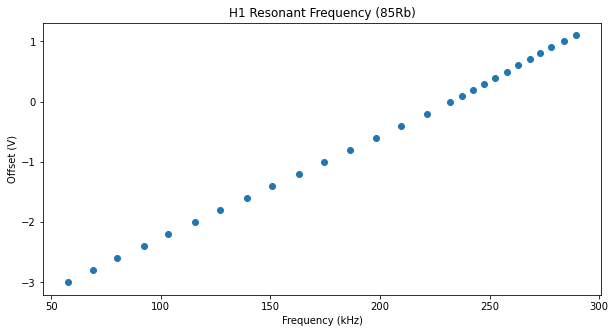

In [8]:
# Resonant frequency plot
plt.figure(figsize = (10,5))

plt.scatter(Rb85_freq_offset['Frequency (kHz)'], Rb85_freq_offset['Offset (V)'],label='data')
plt.title('H1 Resonant Frequency (85Rb)')
plt.ylabel('Offset (V)')
plt.xlabel('Frequency (kHz)')

# Offset at zero frequency



[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 3
    # data points      = 27
    # variables        = 2
    chi-square         = 0.02613162
    reduced chi-square = 0.00104526
    Akaike info crit   = -183.392040
    Bayesian info crit = -180.800366
[[Variables]]
    slope:      0.01758782 +/- 8.6293e-05 (0.49%) (init = 0.01758782)
    intercept: -4.04071752 +/- 0.01778731 (0.44%) (init = -4.040718)


name,value,standard error,relative error,initial value,min,max,vary
slope,0.01758782,8.6293e-05,(0.49%),0.01758781943902604,-inf,inf,True
intercept,-4.04071752,0.01778731,(0.44%),-4.040717518192371,-inf,inf,True


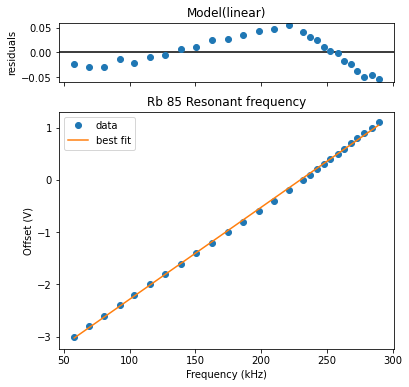

In [9]:
Rb85_fit = line_fit_and_plot(Rb85_freq_offset['Frequency (kHz)'], Rb85_freq_offset['Offset (V)'], title = 'Rb 85 Resonant frequency',\
                            xlabel='Frequency (kHz)', ylabel='Offset (V)')

# Print the results
Rb85_fit

In [10]:
print('Offset at fres = 0: (Rb85)',np.polyval(Rb85_fit,0), 'V')

Offset at fres = 0: (Rb85) -4.040717518192371 V


In [11]:
# Frequencey at zero offset

Rb87_inverse_fit = np.polyfit(Rb87_freq_offset['Offset (V)'], Rb87_freq_offset['Frequency (kHz)'],  1)
Rb87_inverse_fit_0 = np.polyval(Rb87_inverse_fit,0)
print('frequency at 0 offset (Rb85): ',Rb87_inverse_fit_0,' kHz')

frequency at 0 offset (Rb85):  345.96839826839835  kHz


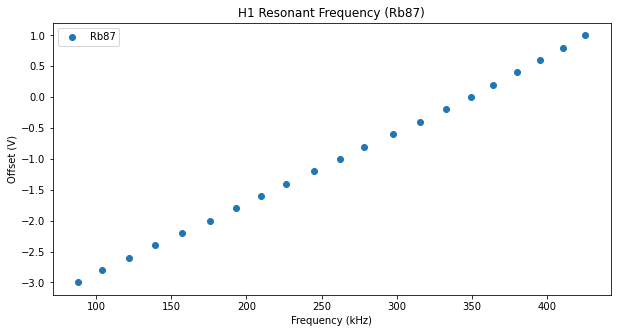

In [12]:
# Resonant frequency plot
plt.figure(figsize = (10,5))

Rb85_freq_offset = pd.read_csv('Rb85_freq_offset.csv', header = 'infer')
Rb87_freq_offset = pd.read_csv('Rb87_freq_offset.csv', header = 'infer', skiprows=1)

plt.scatter(Rb87_freq_offset['Frequency (kHz)'], Rb87_freq_offset['Offset (V)'],  label = 'Rb87') 

plt.title('H1 Resonant Frequency (Rb87)')
plt.ylabel('Offset (V)')
plt.xlabel('Frequency (kHz)')

plt.legend()


[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 3
    # data points      = 21
    # variables        = 2
    chi-square         = 0.01764178
    reduced chi-square = 9.2851e-04
    Akaike info crit   = -144.722161
    Bayesian info crit = -142.633116
[[Variables]]
    slope:      0.01169027 +/- 6.4205e-05 (0.55%) (init = 0.01169027)
    intercept: -4.04503767 +/- 0.01799728 (0.44%) (init = -4.045038)


name,value,standard error,relative error,initial value,min,max,vary
slope,0.01169027,6.4205e-05,(0.55%),0.011690272607281083,-inf,inf,True
intercept,-4.04503767,0.01799728,(0.44%),-4.045037674372741,-inf,inf,True


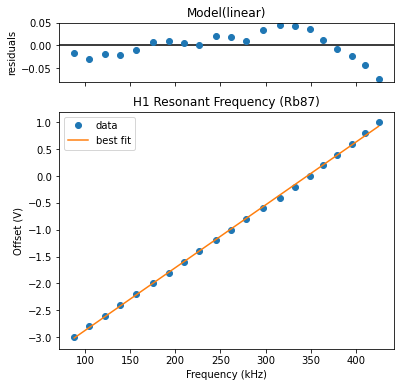

In [13]:
Rb87_fit = line_fit_and_plot(Rb87_freq_offset['Frequency (kHz)'], Rb87_freq_offset['Offset (V)'], title = 'H1 Resonant Frequency (Rb87)', \
                            xlabel = 'Frequency (kHz)', ylabel = 'Offset (V)')

# Print the results
Rb87_fit

In [14]:
#### Used in the experiment for inverted population lifetime

print('Offset at fres = 0 (Rb87):',np.polyval(Rb87_fit,0), 'V')

Offset at fres = 0 (Rb87): -4.045037674372741 V


## Plot of Rabi frequency squared vs. Vpp squared (method 3)

In [15]:
# Import

Rb85_rabi = pd.read_csv('pumping data - 85rabi.csv', header = 'infer')
Rb87_rabi = pd.read_csv('pumping data - 87rabi.csv', header = 'infer')

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 3
    # data points      = 5
    # variables        = 2
    chi-square         = 1.5154e+09
    reduced chi-square = 5.0514e+08
    Akaike info crit   = 101.647583
    Bayesian info crit = 100.866459
[[Variables]]
    slope:      291565.639 +/- 1183.11395 (0.41%) (init = 291565.6)
    intercept:  1732854.17 +/- 44337.9754 (2.56%) (init = 1732854)


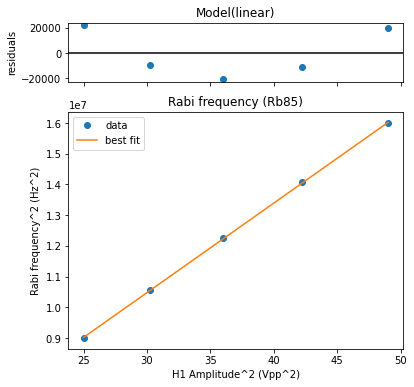

In [16]:
# Calculate frequency

## Note: I chose to discard the first 5 data points, since they appeared to have 
# a different slope than the rest of the data. When using all the data points, the
# intercept was found to be negative, so there could be an issue with the first points

Rb85_rabi = Rb85_rabi[5:]
Rb87_rabi['Frequency (Hz)'] = (Rb87_rabi['# Periods'] / Rb87_rabi['in _ ms']) * 1e3
Rb85_rabi['Frequency (Hz)'] = (Rb85_rabi['# Periods in 4 ms'] / 4) * 1e3

# Plot and fit data
Rb85_rabi_fit = line_fit_and_plot(Rb85_rabi['Vpp']**2, Rb85_rabi['Frequency (Hz)']**2, title = 'Rabi frequency (Rb85)', xlabel = 'H1 Amplitude^2 (Vpp^2)',\
                                 ylabel = 'Rabi frequency^2 (Hz^2)')


[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 3
    # data points      = 13
    # variables        = 2
    chi-square         = 1.0822e+14
    reduced chi-square = 9.8386e+12
    Akaike info crit   = 390.753612
    Bayesian info crit = 391.883511
[[Variables]]
    slope:      504798.622 +/- 32984.2629 (6.53%) (init = 504798.6)
    intercept:  2938726.33 +/- 1937913.22 (65.94%) (init = 2938726)


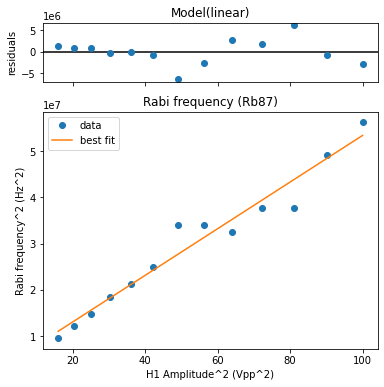

In [17]:
Rb87_rabi_fit = line_fit_and_plot(Rb87_rabi['Vpp']**2, Rb87_rabi['Frequency (Hz)']**2, title = 'Rabi frequency (Rb87)', xlabel = 'H1 Amplitude^2 (Vpp^2)',\
                                 ylabel = 'Rabi frequency^2 (Hz^2)')

## Calculation of theoretical g-factors for both isotopes.

#### Theoretical

In [18]:
## theoretical g-factor calculation, ignoring g_I contribution

# 2 S 1/2 state -> J = 1/2, L = 0, S = 0, I = 3/2, F = 2

J = (1/2)
F_85 = 3
F_87 = 2
I_85 = (5/2)
I_87 = (3/2)
S = (1/2)
L = 0

def calc_g_factors(L,S,I,F,J):
    g_J = 1 + (J * (J + 1) + S * (S + 1) - L * (L + 1)) / (2 * J * (J+1))
    g_F = g_J * (F * (F + 1) + J * (J + 1) - I * (I + 1)) / (2 * F * (F + 1))
    return [g_J, g_F]

g_F_85 = calc_g_factors(L,S,I_85,F_85,J)[1]
g_J_85 = calc_g_factors(L,S,I_85,F_85,J)[0]
g_F_87 = calc_g_factors(L,S,I_87,F_87,J)[1]
g_J_87 = calc_g_factors(L,S,I_87,F_87,J)[0]
print('Theoretical g_J (Rb 85):', g_J_85)
print('Theoretical g_J (Rb 87):', g_J_87)
print('\n')
print('Theoretical g_F (Rb 85):', g_F_85)
print('Theoretical g_F (Rb 87):', g_F_87)


Theoretical g_J (Rb 85): 2.0
Theoretical g_J (Rb 87): 2.0


Theoretical g_F (Rb 85): 0.3333333333333333
Theoretical g_F (Rb 87): 0.5


## Calculation of experimental g factor from the offset measurement, with uncertainty.

In [19]:
B_earth_array = np.array([0.5045, 0.5085, 0.5060, 0.476, 0.4740, 0.5495]) / 10_000 # T 
B_earth = unc.ufloat(np.mean(B_earth_array),np.std(B_earth_array), 'B_earth')
## ^^ Note that B_earth is the largest source of uncertainty

print("B Earth (T)", B_earth)

g_F_85_offset = (h * Rb85_inverse_fit_0 * 1e3) / (muB * B_earth * delta_m_F)
g_F_87_offset = (h * Rb87_inverse_fit_0 * 1e3) / (muB * B_earth * delta_m_F)

print('g_F (Rb 85):',g_F_85_offset)
print('g_F (Rb 87):',g_F_87_offset)


B Earth (T) (5.03+/-0.25)e-05
g_F (Rb 85): 0.326+/-0.016
g_F (Rb 87): 0.491+/-0.024


## Calculation of g factors from Rabi frequency maximum response, with uncertainty

In [20]:
import uncertainties.umath as um

## Omega^2 = omega_1^2 + (omega - omega_0)^2
# intercept = (omega - omega_0)^2
# hbar * omega_0 = muB * g_J * H0 ???? g_F

hbar = const.hbar


omega_85 = 2 * np.pi * 236.0e3

intercept_85_unc = unc.ufloat(Rb85_rabi_fit['intercept'].value,Rb85_rabi_fit['intercept'].stderr)
#print(intercept_85_unc)
omega_0_85 = omega_85 - um.sqrt(intercept_85_unc)

g_F_85_rabi = (hbar * omega_0_85) / (muB * B_earth)


print('g_F (Rb 85):',g_F_85_rabi)



g_F (Rb 85): 0.335+/-0.017


In [21]:

omega_87 = 2 * np.pi * 356.1e3

intercept_87_unc = unc.ufloat(Rb87_rabi_fit['intercept'].value, Rb87_rabi_fit['intercept'].stderr)

omega_0_87 = omega_87 - um.sqrt(intercept_87_unc)

g_F_87_rabi = (hbar * omega_0_87) / (muB * B_earth)

print('g_F (Rb 87):',g_F_87_rabi)

g_F (Rb 87): 0.505+/-0.025


## Ratio of g-factors from all methods, with uncertainty.

In [22]:
print('Ratio of g-factors from all methods, Rb 85 / Rb 87:\n')

estimate_ratio = g_F_estimate_85 / g_F_estimate_87

print('estimate \t', estimate_ratio)

theoretical_ratio = g_F_85 / g_F_87

print('theoretical \t', theoretical_ratio)     
      
offset_ratio = g_F_85_offset / g_F_87_offset

print('from offset \t', offset_ratio)  

rabi_ratio = g_F_85_rabi / g_F_87_rabi

print('from rabi \t', rabi_ratio) 

Ratio of g-factors from all methods, Rb 85 / Rb 87:

estimate 	 0.6590257879656162
theoretical 	 0.6666666666666666
from offset 	 0.664000488670618+/-0
from rabi 	 0.66265+/-0.00017


### Recovery Lifetime 

In [23]:
### Recovery time constant from H0 scan:
# Note repeated values are due to oscilliscope cursor measurements

Rb_85_recovery_t_half_array = np.array([2.64,2.64,2.72,2.72,2.72])
Rb_85_recovery_tau_array = Rb_85_recovery_t_half_array / np.log(2)
Rb_85_recovery_tau = unc.ufloat(np.mean(Rb_85_recovery_tau_array),np.std(Rb_85_recovery_tau_array))

Rb_87_recovery_t_half_array = np.array([3.60,3.52,3.60,3.52,3.60])
Rb_87_recovery_tau_array = Rb_87_recovery_t_half_array / np.log(2)
Rb_87_recovery_tau = unc.ufloat(np.mean(Rb_87_recovery_tau_array),np.std(Rb_87_recovery_tau_array))

print('Recovery time constant from H0 scan: \n')
print('Rb 85\t',Rb_85_recovery_tau, 's')
print('Rb 87\t',Rb_87_recovery_tau, 's')
print('\n')

### Recovery time constant from inverted population:

inverted_recovery_t_half_array = np.array([6.80,6.80,7.20])
inverted_recovery_tau_array = inverted_recovery_t_half_array / np.log(2)
inverted_recovery_tau = unc.ufloat(np.mean(inverted_recovery_tau_array), np.std(inverted_recovery_tau_array))

print('Recovery time constant from inverted population: \n')
print(inverted_recovery_tau, 's')



Recovery time constant from H0 scan: 

Rb 85	 3.88+/-0.06 s
Rb 87	 5.15+/-0.06 s


Recovery time constant from inverted population: 

10.00+/-0.27 s


### Extension: recovery lifetime after RF burst

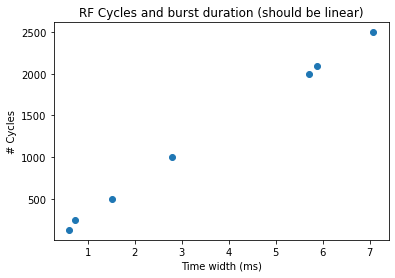

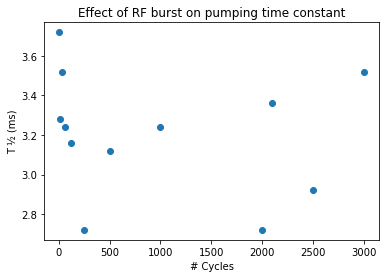

In [24]:
### There is no apparent relationship we could discover between the pumping time constant and the
### number of cycles in the burst

ext_1 = pd.read_csv('pumping data - extension1.csv', header = 'infer')
ext_2 = pd.read_csv('pumping data - extension2.csv', header = 'infer')

#plt.scatter(ext_2['# Cycles'], ext_2['T ½ (ms)'])

# phase = time width % period
# period = 1 / frequency

Omega = (6 / 1.52) * 1e3 # Hz, from dataset
T = 1 / Omega

ext_1['Phase'] = ext_1['# Cycles'] % T

plt.scatter(ext_1['Time width (ms)'], ext_1['# Cycles'])
plt.title('RF Cycles and burst duration (should be linear)')
plt.xlabel('Time width (ms)'); plt.ylabel('# Cycles')
plt.show()
plt.scatter(ext_2['# Cycles'], ext_2['T ½ (ms)'])
plt.title('Effect of RF burst on pumping time constant')
plt.xlabel('# Cycles'); plt.ylabel('T ½ (ms)')
plt.show()
